# 📊 Summary Statistics Analysis: Beauty Product Sales
En este notebook aplicarás estadística descriptiva para descubrir patrones, errores, y oportunidades ocultas en los datos de ventas de una tienda de cosméticos naturales.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

## 1. 📥 Cargar y explorar los datos

In [2]:
df = pd.read_csv('../data/beauty_sales_summary.csv')
df['month'] = pd.to_datetime(df['month'])
df.head()

,product_id,product_name,category,units_sold,unit_price,revenue,month,channel,region
0,P1000,Producto_0,Makeup,453,15.70,7112.10,2023-01-01,Retail,Chile
1,P1000,Producto_0,Makeup,1662,30.04,49926.48,2023-02-01,Online,Chile
2,P1000,Producto_0,Makeup,429,16.39,7031.31,2023-03-01,Retail,Colombia
3,P1000,Producto_0,Makeup,286,36.57,10459.02,2023-04-01,Online,Perú
4,P1000,Producto_0,Makeup,439,26.49,11629.11,2023-05-01,Online,Colombia


### 📌 Descripción general del dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   product_id    480 non-null    object        
 1   product_name  480 non-null    object        
 2   category      480 non-null    object        
 3   units_sold    480 non-null    int64         
 4   unit_price    480 non-null    float64       
 5   revenue       480 non-null    float64       
 6   month         480 non-null    datetime64[ns]
 7   channel       480 non-null    object        
 8   region        480 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 33.9+ KB


### 📊 Estadísticas descriptivas básicas

In [4]:
df.describe(include='all')

,product_id,product_name,category,units_sold,unit_price,revenue,month,channel,region
count,480,480,480,480.000000,480.000000,480.000000,480,480,480
unique,20,20,4,NaN,NaN,NaN,NaN,3,4
top,P1000,Producto_0,Makeup,NaN,NaN,NaN,NaN,Online,México
freq,24,24,216,NaN,NaN,NaN,NaN,231,138
mean,NaN,NaN,NaN,457.847917,28.009083,12899.991521,2023-12-16 10:00:00,NaN,NaN
min,NaN,NaN,NaN,0.000000,1.270000,0.000000,2023-01-01 00:00:00,NaN,NaN
25%,NaN,NaN,NaN,302.000000,16.997500,5850.600000,2023-06-23 12:00:00,NaN,NaN
50%,NaN,NaN,NaN,458.500000,28.155000,10360.825000,2023-12-16 12:00:00,NaN,NaN
75%,NaN,NaN,NaN,554.000000,39.015000,17530.515000,2024-06-08 12:00:00,NaN,NaN
max,NaN,NaN,NaN,2223.000000,49.930000,90712.440000,2024-12-01 00:00:00,NaN,NaN


## 2. 🧠 Clasificación de tipos de datos
- **Categóricas:** `product_id`, `product_name`, `category`, `channel`, `region`
- **Numéricas:** `units_sold`, `unit_price`, `revenue`
- **Temporales:** `month`

> Esta clasificación es fundamental para saber qué tipo de estadística usar en cada caso.

## 3. 🎯 Comparación entre media y mediana por categoría

In [5]:
df.groupby('category')['units_sold'].agg(['mean', 'median']).sort_values(by='mean', ascending=False)

,mean,median
category,,
Haircare,602.000000,503.0
Skincare,555.135417,519.0
Makeup,543.129630,506.0
Fragrance,241.041667,221.5


## 4. 📐 Medidas de dispersión por canal

In [6]:
df.groupby('channel')['revenue'].std().sort_values(ascending=False)

channel
Retail         13420.329602
Online          9112.956249
Distributor     8594.434289
Name: revenue, dtype: float64

## 5. 🔍 Visualización de distribuciones y asimetría (skewness)

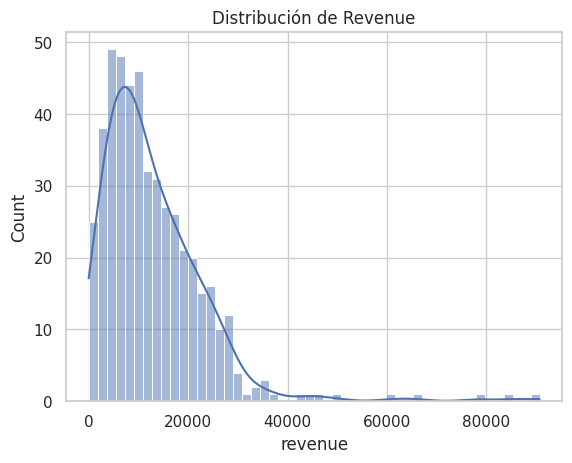

In [7]:
sns.histplot(df['revenue'], bins=50, kde=True)
plt.title('Distribución de Revenue');

In [8]:
print('Skewness:', df['revenue'].skew())

Skewness: 2.77268526245318


## 6. 🗺️ Boxplot de ingresos por región

Text(0.5, 1.0, 'Distribución de Revenue por Región')

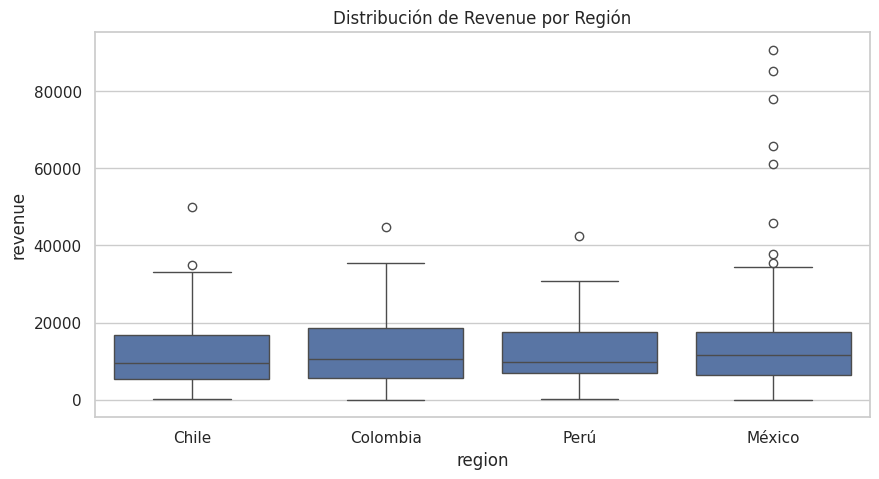

In [9]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='region', y='revenue')
plt.title('Distribución de Revenue por Región')

## 7. 🚨 Detección de outliers usando IQR

In [10]:
Q1 = df['revenue'].quantile(0.25)
Q3 = df['revenue'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['revenue'] < lower_bound) | (df['revenue'] > upper_bound)]
print(f'Total outliers encontrados: {len(outliers)}')
outliers.head()

Total outliers encontrados: 12


,product_id,product_name,category,units_sold,unit_price,revenue,month,channel,region
1,P1000,Producto_0,Makeup,1662,30.04,49926.48,2023-02-01,Online,Chile
6,P1000,Producto_0,Makeup,777,48.72,37855.44,2023-07-01,Distributor,México
19,P1000,Producto_0,Makeup,1551,22.81,35378.31,2024-08-01,Online,Colombia
68,P1002,Producto_2,Skincare,1428,46.03,65730.84,2024-09-01,Online,México
181,P1007,Producto_7,Skincare,1512,28.15,42562.80,2024-02-01,Online,Perú


## 🧠 Reflexión final
- ¿La media o la mediana es más representativa en estos datos?
- ¿Qué regiones presentan mayor varianza?
- ¿Qué podrías hacer con los outliers detectados?
- ¿Qué aprendiste sobre cómo analizar datos reales?